In [ ]:
import math
import random
from collections import defaultdict
from pprint import pprint

# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import re

# Set global styles for plots
sns.set_style(style='white')
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize': (16,9)})

In [ ]:
df = pd.read_csv('Reddit_wsb_labelled.csv', encoding='utf-8')
df.head()

,clean_comment,category
0,it not about the money it about sending message,0
1,math professor scott steiner says the numbers ...,-1
2,exit the system,0
3,new sec filing for gme can someone less retard...,-1
4,not to distract from gme just thought our amc ...,1


In [ ]:
# Removing nuetral comments
df = df[df.category != 0]
df.category.value_counts()

 1    13731
-1    10441
Name: category, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=1000, binary=True)
X = vect.fit_transform(df.clean_comment)

X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split
# Post Titles
X = df.clean_comment
# Labels of polarity(-1,0,1)
y = df.category

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=1000, binary=True)
X_train_vect = vect.fit_transform(X_train)

In [ ]:
X_train_res, y_train_res = X_train_vect, y_train

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_res, y_train_res)
nb.score(X_train_res, y_train_res)

0.8325489993277138

In [ ]:
X_test_vect = vect.transform(X_test)
y_pred = nb.predict(X_test_vect)
y_pred

array([ 1, -1, -1, ..., -1,  1,  1])

In [ ]:
np.mean(y_pred)

0.16980351602895552

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 82.61%

F1 Score: 84.96

Confusion Matrix:
 [[1619  453]
 [ 388 2375]]


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)
lr.score(X_train_res, y_train_res)

0.8700936029373739

In [ ]:
X_test_vect = vect.transform(X_test)
y_pred = lr.predict(X_test_vect)
y_pred

array([ 1, -1, -1, ..., -1,  1,  1])

In [ ]:
np.mean(y_pred)

0.16359875904860394

In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 85.73%

F1 Score: 87.63

Confusion Matrix:
 [[1702  370]
 [ 320 2443]]


In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train_res, y_train_res)
lsvc.score(X_train_res, y_train_res)

0.8712830325283136

In [ ]:
X_test_vect = vect.transform(X_test)
y_pred = lsvc.predict(X_test_vect)
y_pred

array([ 1, -1, -1, ..., -1, -1,  1])

In [ ]:
np.mean(y_pred)

0.14167528438469493

In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 85.58%

F1 Score: 87.38

Confusion Matrix:
 [[1725  347]
 [ 350 2413]]



Average accuracy across folds: 81.77%

Average F1 score across folds: 84.26%

Average Confusion Matrix across folds: 



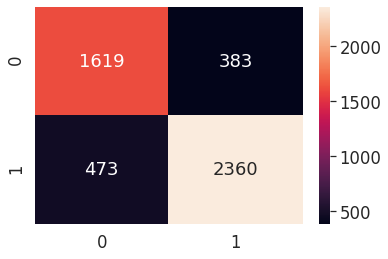

In [ ]:
from sklearn.model_selection import ShuffleSplit

X = df.clean_comment
y = df.category

ss = ShuffleSplit(n_splits=10, test_size=0.2)
accs = []
f1s = []
cms = []

for train_index, test_index in ss.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit vectorizer and transform X train, then transform X test
    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)
    
    # Oversample
    X_train_res, y_train_res = X_train_vect, y_train
    
    # Fit Naive Bayes on the vectorized X with y train labels, 
    # then predict new y labels using X test
    nb.fit(X_train_res, y_train_res)
    y_pred = nb.predict(X_test_vect)
    
    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))
    cms.append(confusion_matrix(y_test, y_pred))

    NB_confusion_matrix = format(sum(cms) / len(cms))
    
print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds: \n")
# .format(sum(cms) / len(cms)))

sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

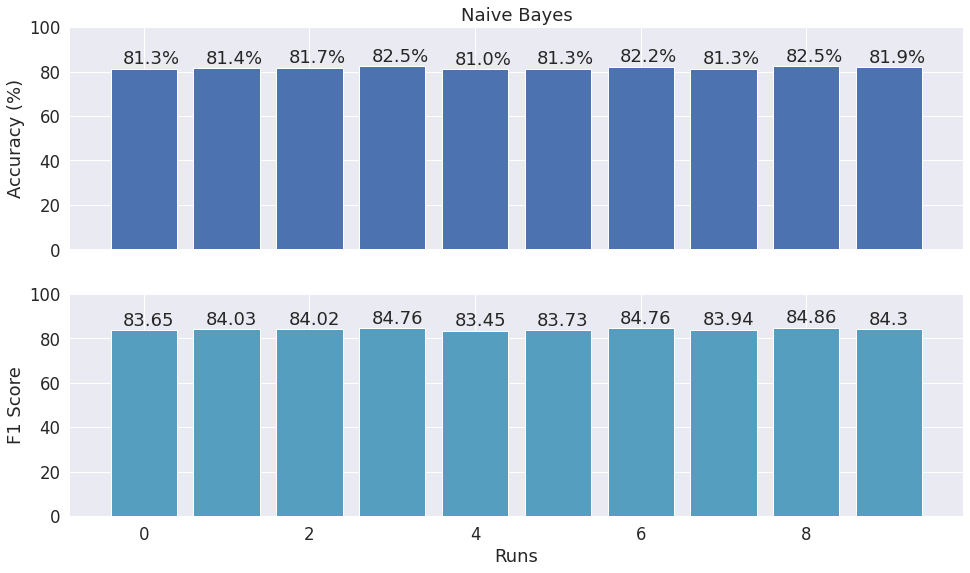

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,9))

acc_scores = [round(a * 100, 1) for a in accs]
f1_scores = [round(f * 100, 2) for f in f1s]

x1 = np.arange(len(acc_scores))
x2 = np.arange(len(f1_scores))

ax1.bar(x1, acc_scores)
ax2.bar(x2, f1_scores, color='#559ebf')

# Place values on top of bars
for i, v in enumerate(list(zip(acc_scores, f1_scores))):
    ax1.text(i - 0.25, v[0] + 2, str(v[0]) + '%')
    ax2.text(i - 0.25, v[1] + 2, str(v[1]))

ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Naive Bayes')
ax1.set_ylim([0, 100])

ax2.set_ylabel('F1 Score')
ax2.set_xlabel('Runs')
ax2.set_ylim([0, 100])

sns.despine(bottom=True, left=True)  # Remove the ticks on axes for cleaner presentation

plt.show()


Average accuracy across folds: 84.79%

Average F1 score across folds: 86.69%

Average Confusion Matrix across folds: 



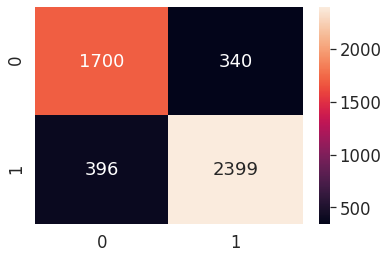

In [ ]:
from sklearn.model_selection import ShuffleSplit

X = df.clean_comment
y = df.category

ss = ShuffleSplit(n_splits=10, test_size=0.2)
# sm = SMOTE()

accs = []
f1s = []
cms = []

for train_index, test_index in ss.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit vectorizer and transform X train, then transform X test
    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)
    
    # Oversample
    X_train_res, y_train_res = X_train_vect, y_train
    
    # Fit LR on the vectorized X with y train labels, 
    # then predict new y labels using X test
    lr.fit(X_train_res, y_train_res)
    y_pred = lr.predict(X_test_vect)
    
    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))
    cms.append(confusion_matrix(y_test, y_pred))

    NB_confusion_matrix = format(sum(cms) / len(cms))
    
print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds: \n")
# .format(sum(cms) / len(cms)))

sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

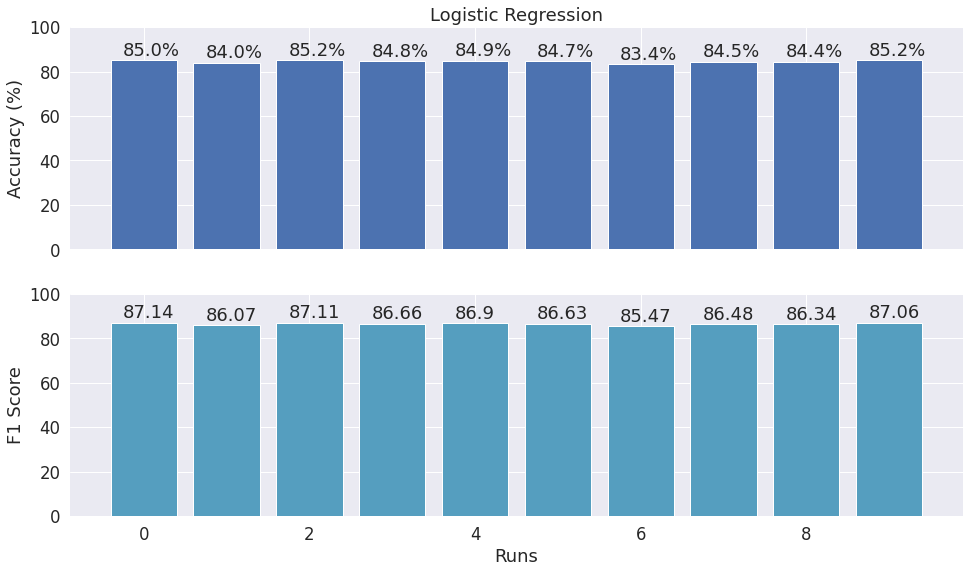

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,9))

acc_scores = [round(a * 100, 1) for a in accs]
f1_scores = [round(f * 100, 2) for f in f1s]

x1 = np.arange(len(acc_scores))
x2 = np.arange(len(f1_scores))

ax1.bar(x1, acc_scores)
ax2.bar(x2, f1_scores, color='#559ebf')

# Place values on top of bars
for i, v in enumerate(list(zip(acc_scores, f1_scores))):
    ax1.text(i - 0.25, v[0] + 2, str(v[0]) + '%')
    ax2.text(i - 0.25, v[1] + 2, str(v[1]))

ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Logistic Regression')
ax1.set_ylim([0, 100])

ax2.set_ylabel('F1 Score')
ax2.set_xlabel('Runs')
ax2.set_ylim([0, 100])

sns.despine(bottom=True, left=True)  # Remove the ticks on axes for cleaner presentation

plt.show()


Average accuracy across folds: 84.68%

Average F1 score across folds: 86.47%

Average Confusion Matrix across folds: 



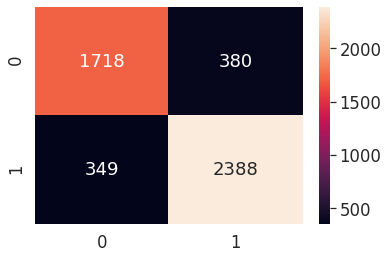

In [ ]:
from sklearn.model_selection import ShuffleSplit

X = df.clean_comment
y = df.category

ss = ShuffleSplit(n_splits=10, test_size=0.2)
# sm = SMOTE()

accs = []
f1s = []
cms = []

for train_index, test_index in ss.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit vectorizer and transform X train, then transform X test
    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)
    
    # Oversample
    X_train_res, y_train_res = X_train_vect, y_train
    
    # Fit LSVC on the vectorized X with y train labels, 
    # then predict new y labels using X test
    lsvc.fit(X_train_res, y_train_res)
    y_pred = lsvc.predict(X_test_vect)
    
    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))
    cms.append(confusion_matrix(y_test, y_pred))

    NB_confusion_matrix = format(sum(cms) / len(cms))
    
print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds: \n")
# .format(sum(cms) / len(cms)))

sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

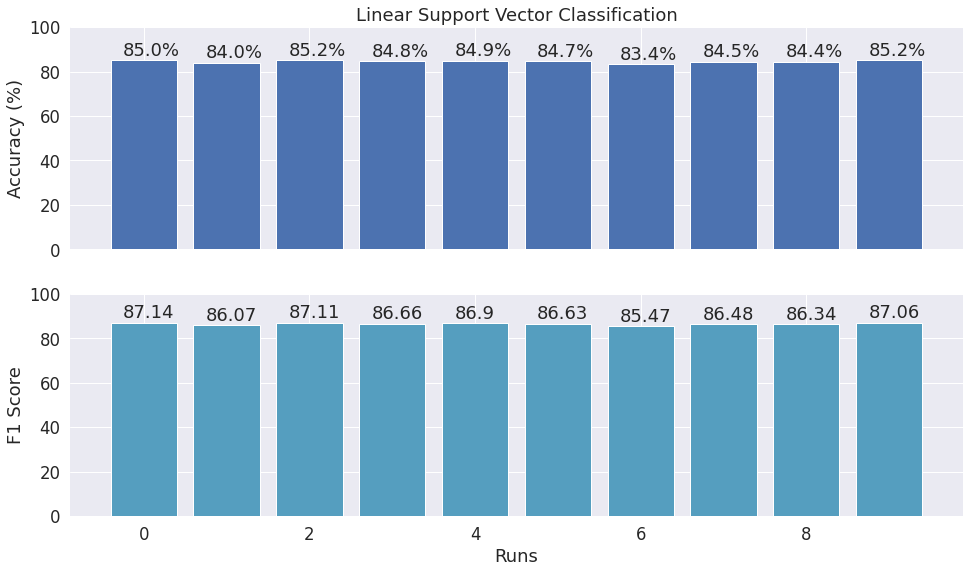

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,9))

acc_scores = [round(a * 100, 1) for a in accs]
f1_scores = [round(f * 100, 2) for f in f1s]

x1 = np.arange(len(acc_scores))
x2 = np.arange(len(f1_scores))

ax1.bar(x1, acc_scores)
ax2.bar(x2, f1_scores, color='#559ebf')

# Place values on top of bars
for i, v in enumerate(list(zip(acc_scores, f1_scores))):
    ax1.text(i - 0.25, v[0] + 2, str(v[0]) + '%')
    ax2.text(i - 0.25, v[1] + 2, str(v[1]))

ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Linear Support Vector Classification')
ax1.set_ylim([0, 100])

ax2.set_ylabel('F1 Score')
ax2.set_xlabel('Runs')
ax2.set_ylim([0, 100])

sns.despine(bottom=True, left=True)  # Remove the ticks on axes for cleaner presentation

plt.show()

In [ ]:
# Text Preprocessing
def clean_text_date(text):
    text = text.lower()

    # Replacing Handlers with Empty String
    text = re.sub('@[^\s]+','',text)

    # Replacing URLs with Empty String
    text = re.sub(r"http\S+", "",text)

    # Remove all the special characters
    text = ' '.join(re.findall(r'\w+', text))

    # Replacing Single Characters with Empty String
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Removing Extra Spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text

# Loop through daily title CSV's
# Commenting the weekends
filelist = {'2021-01-28':'day1.csv',
            '2021-01-29':'day2.csv',
            # '2021-01-30': 'day3.csv',
            # '2021-01-31':'day4.csv',
            '2021-02-01': 'day5.csv',
            '2021-02-02':'day6.csv',
            '2021-02-03':'day7.csv',
            '2021-02-04':'day8.csv',
            '2021-02-05':'day9.csv',
            # '2021-02-06':'day10.csv',
            # '2021-02-07':'day11.csv',
            # '2021-02-08':'day12.csv'
            }
nb_array = []
lr_array = []
lsvc_array = []

for key in filelist:
    reddit = pd.read_csv(filelist[key], encoding="utf-8")
    reddit_title = reddit["title"].dropna()
    reddit_title = reddit_title.apply(lambda x: clean_text_date(x))
    sample = reddit_title
    sample_vect = vect.transform(sample)
    # Predictions
    nb_array.append(np.mean(nb.predict(sample_vect)))
    lr_array.append(np.mean(lr.predict(sample_vect)))
    lsvc_array.append(np.mean(lsvc.predict(sample_vect)))

print((nb_array) ,'\n',(lr_array),'\n', (lsvc_array))


[-0.022556390977443608, -0.010322416210016568, 0.2918552036199095, 0.30492676431424764, 0.34695421869088156, 0.37043686415320165, 0.2894534257120862] 
 [0.059314954051796154, 0.06499299095195617, 0.19457013574660634, 0.1744340878828229, 0.21604237608777904, 0.25074805505685216, 0.1624326404926867] 
 [0.004177109440267335, 0.014910156747801709, 0.10407239819004525, 0.1318242343541944, 0.1592886870979947, 0.1813285457809695, 0.10238645111624327]


In [ ]:
# Historical GME data
!pip install tiingo

In [ ]:
from tiingo import TiingoClient
config = {}
config['session'] = True
config['api_key'] = "XXXXXXXXXX"
client = TiingoClient(config)

In [ ]:
ticker_metadata = client.get_ticker_metadata("GME")
ticker_price = client.get_ticker_price("GME", frequency="daily")
historical_prices = client.get_dataframe("GME", fmt='csv', startDate='2021-01-28', endDate='2021-02-05', frequency='daily')
tickers = client.list_stock_tickers()

In [ ]:
historical_prices = historical_prices.reset_index()
historical_prices["date"] = pd.to_datetime(historical_prices.date).dt.date
historical_prices

,index,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,2021-01-28,193.60,483.0000,112.2500,265.00,58815805,193.60,483.0000,112.2500,265.00,58815805,0.0,1.0
1,1,2021-01-29,325.00,413.9800,250.0000,379.71,49414294,325.00,413.9800,250.0000,379.71,49414294,0.0,1.0
2,2,2021-02-01,225.00,322.0000,212.0000,316.56,37382152,225.00,322.0000,212.0000,316.56,37382152,0.0,1.0
3,3,2021-02-02,90.00,158.0000,74.2201,140.76,76663691,90.00,158.0000,74.2201,140.76,76663691,0.0,1.0
4,4,2021-02-03,92.41,113.3999,85.2500,112.01,42698511,92.41,113.3999,85.2500,112.01,42698511,0.0,1.0
5,5,2021-02-04,53.50,91.5000,53.3300,91.19,62427275,53.50,91.5000,53.3300,91.19,62427275,0.0,1.0
6,6,2021-02-05,63.77,95.0000,51.0900,54.04,81345013,63.77,95.0000,51.0900,54.04,81345013,0.0,1.0


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

trace1 = go.Scatter(
    y=historical_prices['close'],
    x=[*filelist],
    name='Closing Price',
    line=dict(color='red', width=4),

)
trace2 = go.Scatter(
    y=nb_array,
    x=[*filelist],
    name='Multinomial Naive Bayes Model',
    yaxis='y2'

)
trace3 = go.Scatter(
    y=lr_array,
    x=[*filelist],
    name='Logistic Regression Model',
    yaxis='y2'

)
trace4 = go.Scatter(
    y=lsvc_array,
    x=[*filelist],
    name='Linear Support Vector Classification Model',
    yaxis='y2'

)
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 1000, title = 'Sentiments (mean of the array of different models) with respect to the date',xaxis=dict(
      tickangle=0
    ))
fig.show()
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 1000, title = 'Sentiments (mean of the array of different models) and Closing Price plotted with respect to the date',xaxis=dict(
      tickangle=0
    ))
fig.show()